In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

ci_df = pd.read_csv('test_loc_updated - Final_repositories.csv (1).csv')
print("First 5 rows Below : ")
print(ci_df.head())
print("\n Description Below : ")
print(ci_df.describe())
print("\n CI Projects - Numeric Columns with NaN values:")
print(ci_df.select_dtypes(include=['number']).isna().sum())
print("\n CI Projects - Numeric Columns Variance:")
print(ci_df.select_dtypes(include=['number']).var())
print("\n CI Projects Data Types:")
print(ci_df.dtypes)


First 5 rows Below : 
                        repo_name  stars  issues  open_prs  closed_prs  \
0                   alibaba/nacos  30811     242        13        4134   
1                   alibaba/canal  28794    1156        62         635   
2  OpenAPITools/openapi-generator  22745    5122       516       11242   
3             pockethub/PocketHub   9386     127         2         628   
4          java-native-access/jna   8616     107        14         830   

   total_prs language  is_fork  \
0       4147     Java    False   
1        697     Java    False   
2      11758     Java    False   
3        630     Java    False   
4        844     Java    False   

                                                 url  size_mb  uses_travis  \
0                   https://github.com/alibaba/nacos    59.37         True   
1                   https://github.com/alibaba/canal    23.52         True   
2  https://github.com/OpenAPITools/openapi-generator   881.42         True   
3             ht

0    0.497029
1    0.183103
2    0.431293
3    0.007607
4    0.736005
Name: Test_Ratio, dtype: float64
Average Code Coverage Percentage is  18.36611463873881


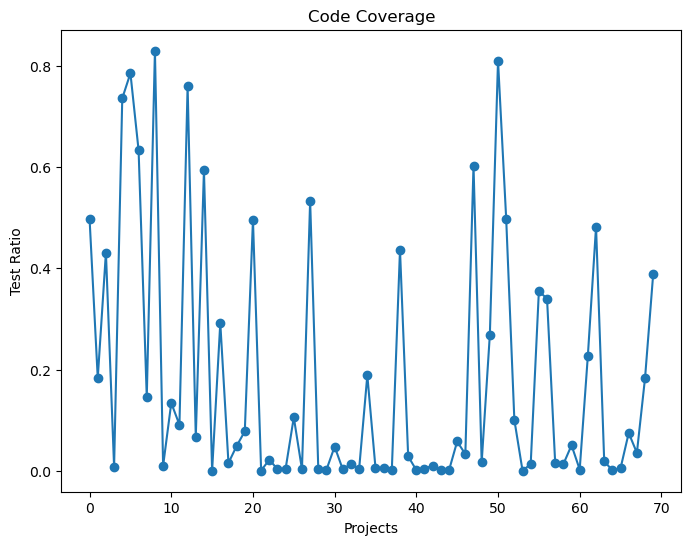

In [2]:
#Calculating and Plotting Test Code Ratio
ci_df['Test_Ratio'] = ci_df['test_LOC'] / ci_df['total_LOC']
print(ci_df['Test_Ratio'].head())
plt.figure(figsize=(8, 6))
plt.title('Code Coverage')
plt.plot(range(len(ci_df)),ci_df['Test_Ratio'], marker='o', linestyle='-')  # Line plot with markers
plt.xlabel('Projects')
plt.ylabel('Test Ratio')
mean_value = ci_df['Test_Ratio'].mean()
print("Average Code Coverage Percentage is ",mean_value*100)

0            inf
1      18.459964
2    1384.712766
3       0.112835
4      46.621852
Name: BeforeCI_Ratio, dtype: float64
0    23.227405
1    37.318345
2    72.050775
3     0.173285
4    75.019327
Name: AfterCI_Ratio, dtype: float64


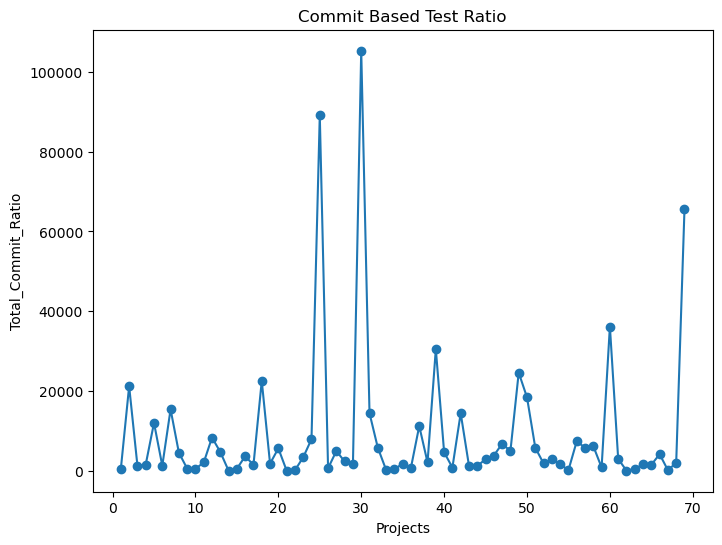

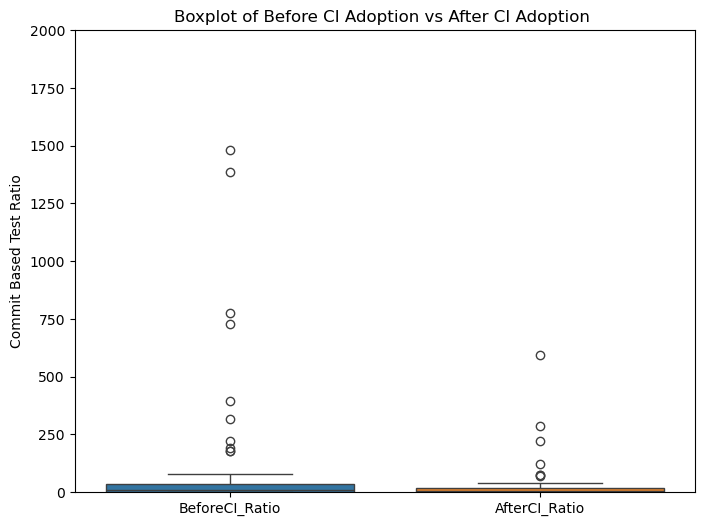

In [3]:
#Calculating and Plotting Commit Based Test Code Ratio 
ci_df['Total_Commit_Ratio'] = ci_df['test_LOC'] / ci_df['commits_before_CI']+ci_df['commits_after_CI']
plt.figure(figsize=(8, 6))
plt.title('Commit Based Test Ratio')
plt.plot(range(len(ci_df)),ci_df['Total_Commit_Ratio'], marker='o', linestyle='-')  # Line plot with markers
plt.xlabel('Projects')
plt.ylabel('Total_Commit_Ratio')


ci_df['BeforeCI_Ratio'] = ci_df['test_LOC'] / ci_df['commits_before_CI']
print(ci_df['BeforeCI_Ratio'].head())
ci_df['AfterCI_Ratio'] = ci_df['test_LOC'] / ci_df['commits_after_CI']
print(ci_df['AfterCI_Ratio'].head())
plt.figure(figsize=(8, 6))
plt.ylim(0.0, 2000)
sns.boxplot(data=ci_df[['BeforeCI_Ratio', 'AfterCI_Ratio']])  
plt.title('Boxplot of Before CI Adoption vs After CI Adoption ')
plt.ylabel('Commit Based Test Ratio')
plt.show()

In [4]:
#Performing Wilcoxon Signed-Rank Test.
w_stat, p_val = stats.wilcoxon(ci_df['BeforeCI_Ratio'], ci_df['AfterCI_Ratio'])
print(f"Wilcoxon Test Statistic: {w_stat}")
print(f"Wilcoxon P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Statistically significant difference between Before and After CI test ratios.")
else:
    print("No significant difference between Before and After CI test ratios.")

Wilcoxon Test Statistic: 477.0
Wilcoxon P-value: 7.469698415164304e-06
Statistically significant difference between Before and After CI test ratios.
